# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_krempa import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json()
        
        response = requests.get(city_url)
        
        status_code = response.status_code
        
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 8 | crixas
Processing Record 2 of Set 8 | villa de arista
Processing Record 3 of Set 8 | ulsteinvik
Processing Record 4 of Set 8 | mokhsogollokh
Processing Record 5 of Set 8 | gadani
Processing Record 6 of Set 8 | luderitz
Processing Record 7 of Set 8 | hasaki
Processing Record 8 of Set 8 | lisala
Processing Record 9 of Set 8 | vila franca do campo
Processing Record 10 of Set 8 | vicuna
Processing Record 11 of Set 8 | port elizabeth
Processing Record 12 of Set 8 | mata-utu
Processing Record 13 of Set 8 | ancud
Processing Record 14 of Set 8 | san luis potosi
Processing Record 15 of Set 8 | murree
Processing Record 16 of Set 8 | el granada
Processing Record 17 of Set 8 | belmonte
Processing Record 18 of Set 8 | sirohi
Processing Record 19 of Set 8 | mary
Processing Record 20 of Set 8 | flin flon
Processing Record 21 of Set 8 | fiambala
Processing Record 22 of Set 8 | harrisonburg
Processing Record 23 of Set 8 | luorong
Processing Record 24 of Set 8 | bollnas
Pr

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          611
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,52.83,88.0,100.0,13.00,NZ,1.717651e+09
1,iskateley,67.6803,53.1512,41.02,86.0,97.0,10.00,RU,1.717651e+09
2,puerto natales,-51.7236,-72.4875,34.09,99.0,100.0,2.13,CL,1.717651e+09
3,katsuura,35.1333,140.3000,71.53,68.0,100.0,10.07,JP,1.717651e+09
4,wailua homesteads,22.0669,-159.3780,81.03,83.0,100.0,10.36,US,1.717651e+09


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,52.83,88.0,100.0,13.00,NZ,1.717651e+09
1,iskateley,67.6803,53.1512,41.02,86.0,97.0,10.00,RU,1.717651e+09
2,puerto natales,-51.7236,-72.4875,34.09,99.0,100.0,2.13,CL,1.717651e+09
3,katsuura,35.1333,140.3000,71.53,68.0,100.0,10.07,JP,1.717651e+09
4,wailua homesteads,22.0669,-159.3780,81.03,83.0,100.0,10.36,US,1.717651e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

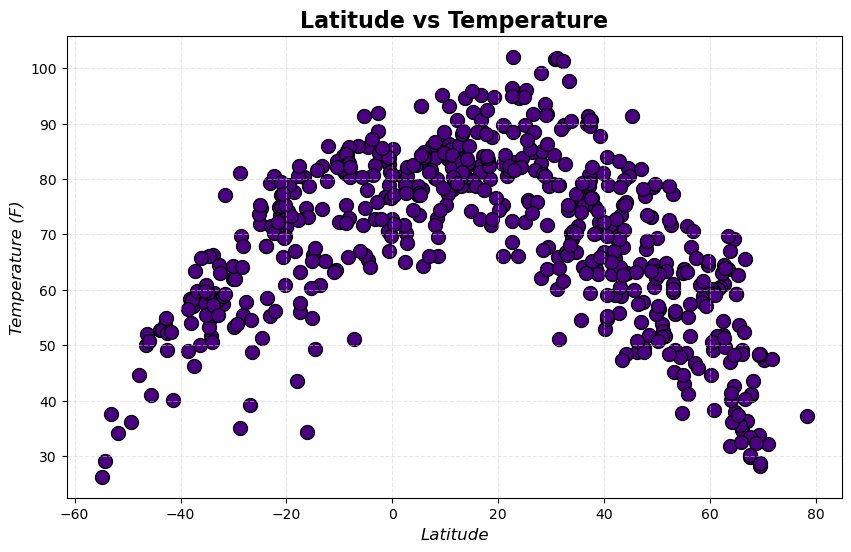

In [52]:
# Build scatter plot for latitude vs. temperature
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="indigo", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig1_krempa.png")
plt.show()

#### Latitude Vs. Humidity

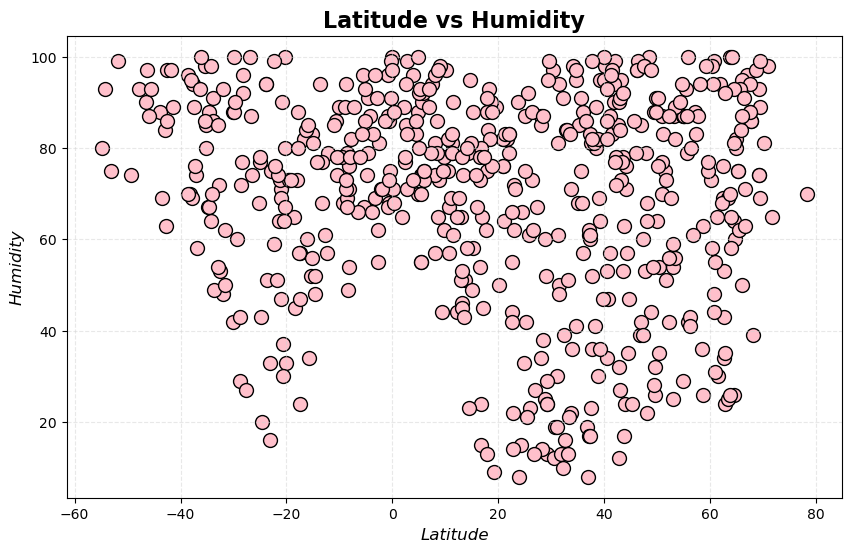

In [53]:
 # Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="pink", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig2_krempa.png")
plt.show()

#### Latitude Vs. Cloudiness

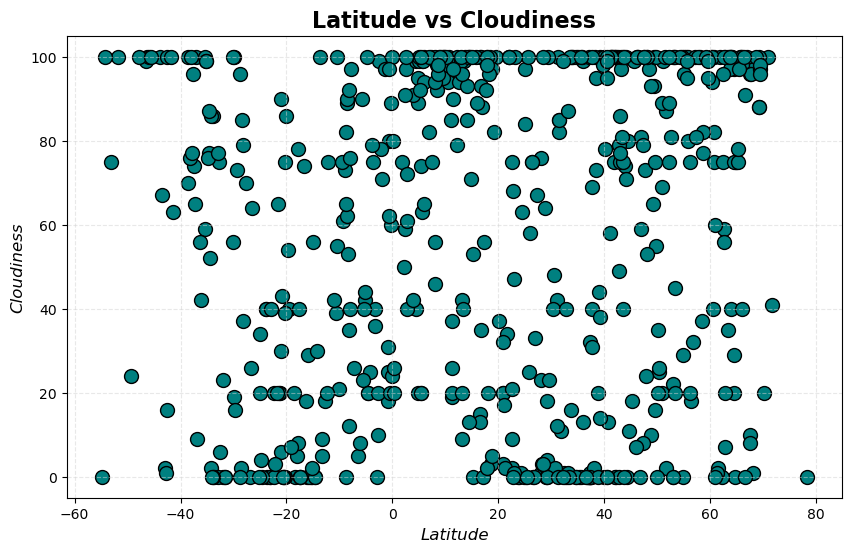

In [54]:
 # Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="teal", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig3_krempa.png")
plt.show()

#### Latitude vs. Wind Speed Plot

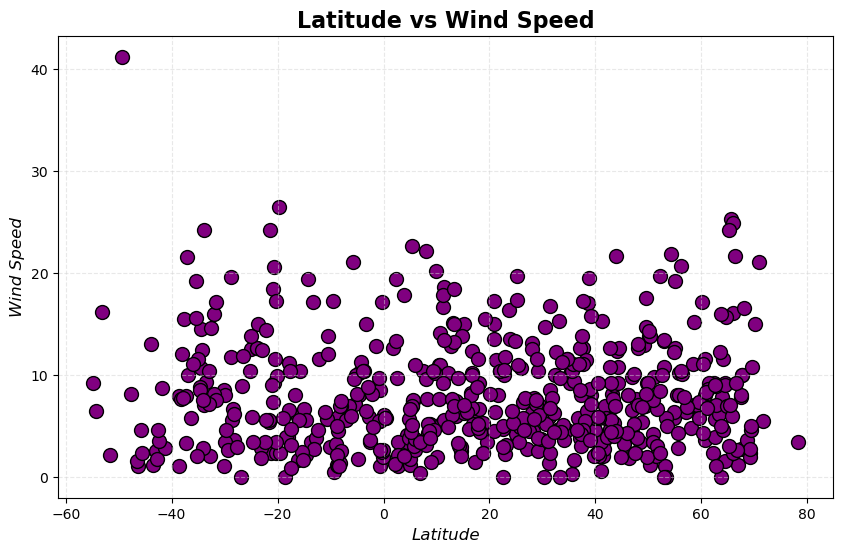

In [55]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="purple", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig4_krempa.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_values, y_values, facecolor="pink", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") 
    
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iskateley,67.6803,53.1512,41.02,86.0,97.0,10.00,RU,1.717651e+09
3,katsuura,35.1333,140.3000,71.53,68.0,100.0,10.07,JP,1.717651e+09
4,wailua homesteads,22.0669,-159.3780,81.03,83.0,100.0,10.36,US,1.717651e+09
5,bethel,41.3712,-73.4140,70.65,83.0,100.0,1.99,US,1.717651e+09
6,brisas barra de suchiate,14.5500,-92.2167,78.98,80.0,100.0,2.53,MX,1.717651e+09


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,52.83,88.0,100.0,13.00,NZ,1.717651e+09
2,puerto natales,-51.7236,-72.4875,34.09,99.0,100.0,2.13,CL,1.717651e+09
7,invercargill,-46.4000,168.3500,52.02,97.0,100.0,1.01,NZ,1.717651e+09
10,hermanus,-34.4187,19.2345,54.81,86.0,52.0,14.45,ZA,1.717651e+09
12,adamstown,-25.0660,-130.1015,71.87,77.0,34.0,12.50,PN,1.717651e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5466091383026155


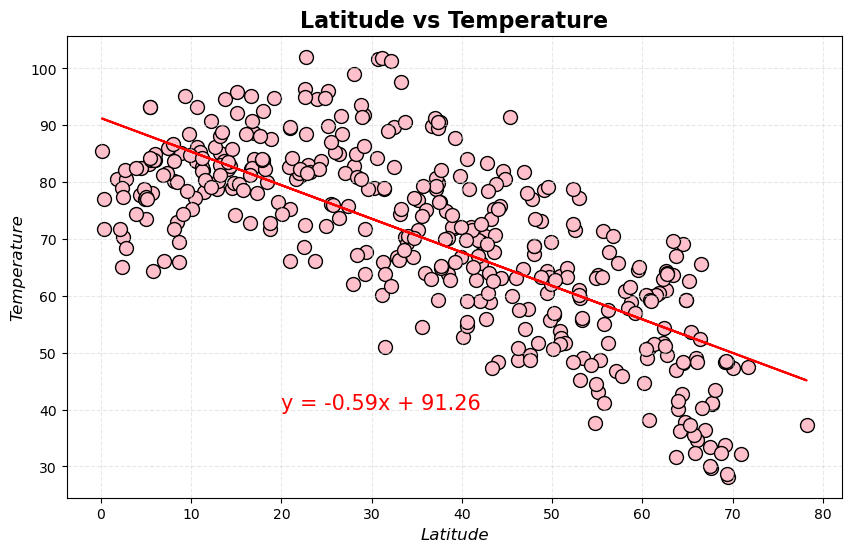

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.5546591064181228


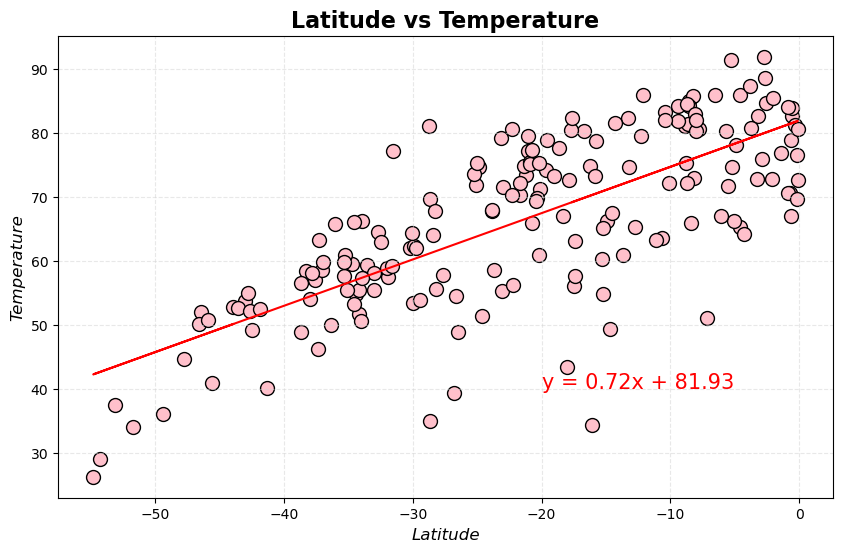

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** In the Northern Hemisphere, the temperature decreases as the latitude decreases. The opposite is the same for the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 3.843161381736631e-05


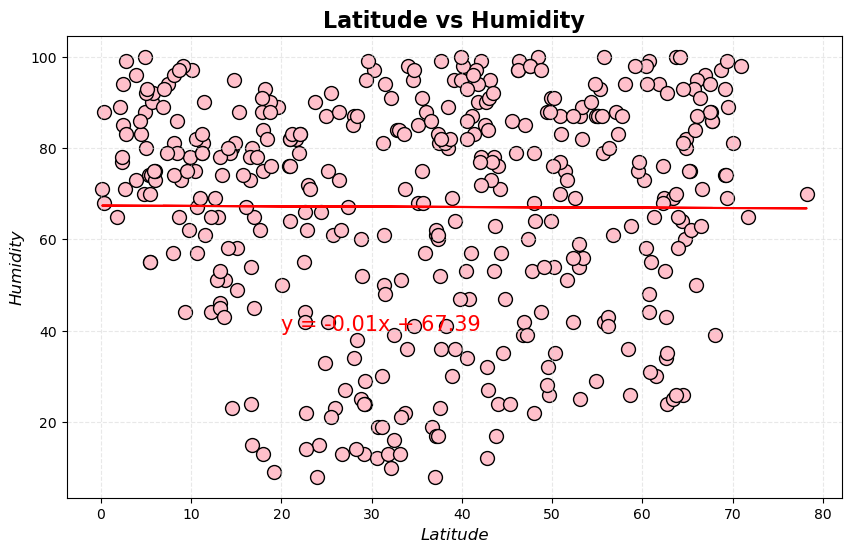

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity 
doRegression(x_values, y_values, "Latitude", "Humidity", (20,40))

The r-squared is: 0.004852507097646767


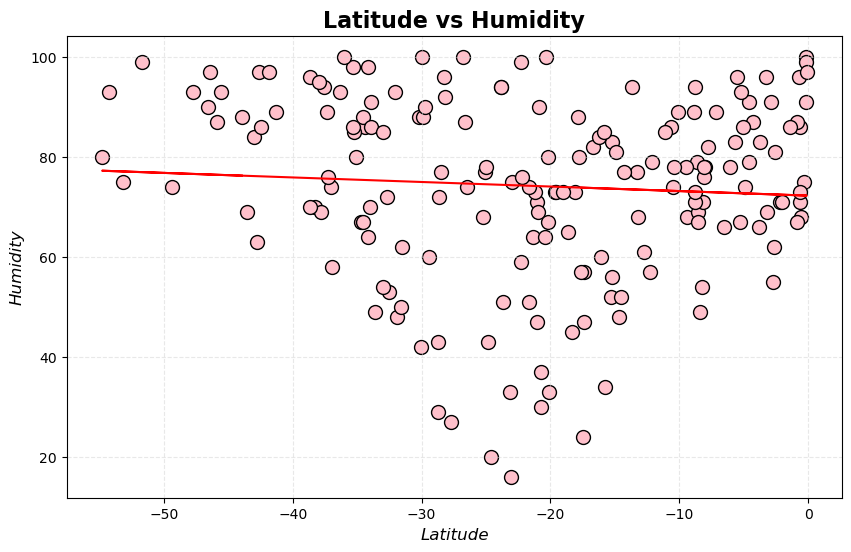

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity 
doRegression(x_values, y_values, "Latitude", "Humidity", (20,40))

**Discussion about the linear relationship:** There does not seem to be much of a defined relationship between humidity and latitiude, even when the different hemispheres factor in.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 5.4208478828492996e-05


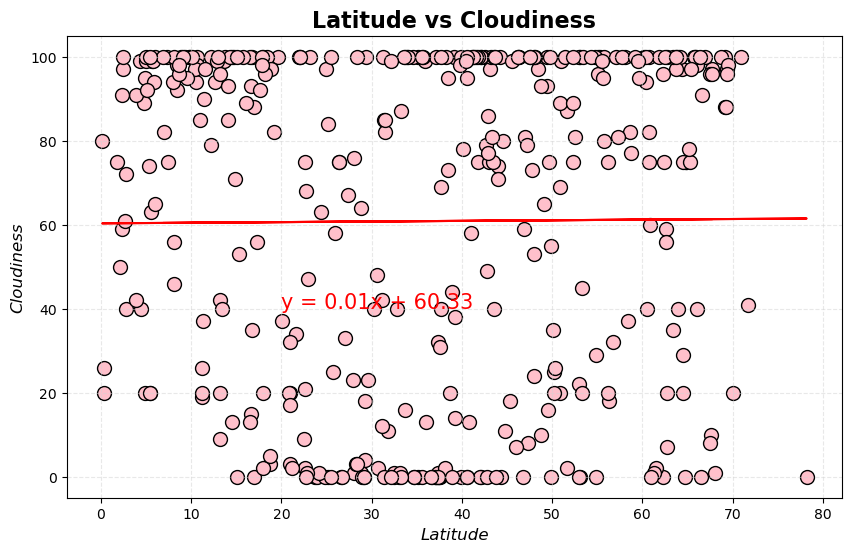

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness 
doRegression(x_values, y_values, "Latitude", "Cloudiness", (20,40))

The r-squared is: 0.02349507584577721


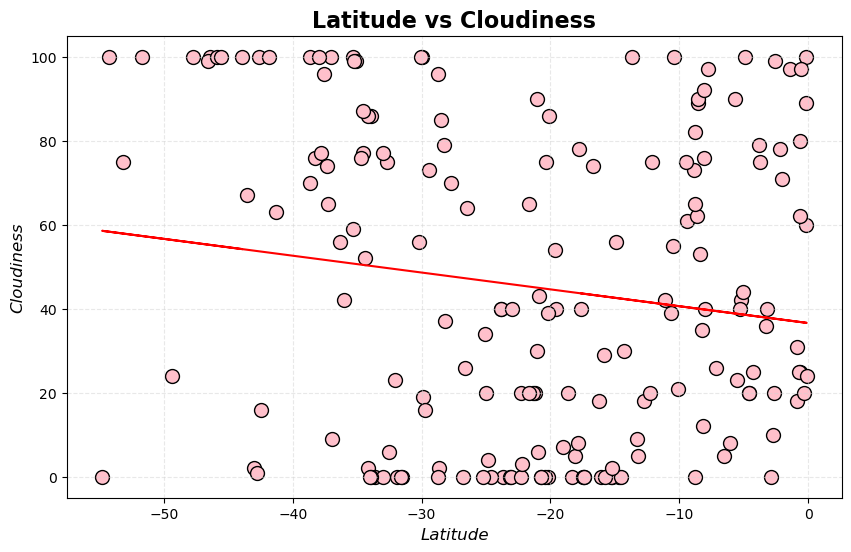

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness 
doRegression(x_values, y_values, "Latitude", "Cloudiness", (20,40))

**Discussion about the linear relationship:** Again, there does not seem to be a defined linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']
doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,40))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Wind Speed']
doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,40))

**Discussion about the linear relationship:** Lower wind speed seems to be the most common despite latitude and hemisphere. 